Import the Dataset

In [1]:
# import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [2]:
# connecting google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading the excel file
df = pd.read_excel('/content/drive/MyDrive/FTTH-DataSet.xlsx')

In [4]:
# to see all the columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
# print first 5 rows in the data
df.head()

,ID,GOVERNORATE,Customer with orange_MONTHS,CUSTOMER_AGE_MONTHS,CUSTOMER_GENDER,COMMITMENT,COMMITMENT_FG,OF_SPEED,OF_PREV_SPEED,MIGRATION_FLAG,LAST_LINK_QUALITY,LAST_LINK_STATUS,LAST_POWER_VALIDATION,LAST_LINK_PRIORITY,Disconnection_TOTAL_MAX_day,Disconnection_TOTAL_MIN_day,Disconnection_TOTAL_SUM_Month,Disconnection_TOTAL_MEAN_Month,GB_TOTAL_CONSUMPTION_Month1,GB_TOTAL_CONSUMPTION_Month2,GB_TOTAL_CONSUMPTION_Month3,TARGET
0,1,West Amman,48.741935,567.677419,M,24,1,200,100.0,y,Reduced robustness,Connected,Abnormal,Regular,1.0,1.0,32.0,1.000000,645.685532,561.726552,519.477249,0
1,2,West Amman,44.838710,740.580645,M,24,0,100,100.0,y,Good,Connected,None,Regular,1.0,1.0,4.0,1.000000,174.360611,159.508825,145.229521,0
2,3,West Amman,44.612903,531.096774,M,24,1,200,100.0,y,Good,Connected,None,Regular,2.0,1.0,8.0,1.333333,299.379466,319.849905,257.353694,0
3,4,Balqa,43.741935,645.612903,M,24,0,200,100.0,y,Good,Connected,None,Regular,1.0,1.0,6.0,1.000000,477.543451,791.806873,569.299840,0
4,5,West Amman,41.548387,311.774194,M,12,1,400,100.0,y,Good,Connected,None,Regular,2.0,1.0,16.0,1.142857,891.318951,937.062921,791.050654,0


In [6]:
import plotly.express as px
px.scatter(data_frame=df,
    x='OF_SPEED',
    y='GB_TOTAL_CONSUMPTION_Month1')

In [ ]:
#  (rows, columns) in our dataset
df.shape

(94478, 22)

In [ ]:
# check if there's duplicated data
df.duplicated().sum()

0

In [ ]:
# check the missing values in the data
missing_values = df.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False).reset_index().rename(columns={'index': 'columns', 0: 'number of missing values'})

,columns,number of missing values
0,OF_PREV_SPEED,74714
1,GB_TOTAL_CONSUMPTION_Month3,4242
2,Disconnection_TOTAL_MAX_day,625
3,Disconnection_TOTAL_MIN_day,625
4,Disconnection_TOTAL_SUM_Month,625
5,Disconnection_TOTAL_MEAN_Month,625
6,GB_TOTAL_CONSUMPTION_Month2,367
7,GOVERNORATE,323
8,GB_TOTAL_CONSUMPTION_Month1,155
9,CUSTOMER_GENDER,54


In [ ]:
# missing values aggregation
df.isnull().sum().sum()

82467

In [ ]:
#check the data type for each column
df.dtypes


ID                                  int64
GOVERNORATE                        object
Customer with orange_MONTHS       float64
CUSTOMER_AGE_MONTHS               float64
CUSTOMER_GENDER                    object
COMMITMENT                          int64
COMMITMENT_FG                       int64
OF_SPEED                            int64
OF_PREV_SPEED                     float64
MIGRATION_FLAG                     object
LAST_LINK_QUALITY                  object
LAST_LINK_STATUS                   object
LAST_POWER_VALIDATION              object
LAST_LINK_PRIORITY                 object
Disconnection_TOTAL_MAX_day       float64
Disconnection_TOTAL_MIN_day       float64
Disconnection_TOTAL_SUM_Month     float64
Disconnection_TOTAL_MEAN_Month    float64
GB_TOTAL_CONSUMPTION_Month1       float64
GB_TOTAL_CONSUMPTION_Month2       float64
GB_TOTAL_CONSUMPTION_Month3       float64
TARGET                              int64
dtype: object

In [ ]:
# see how many variable in each feature
df.nunique().sort_values(ascending = False)

ID                                94478
GB_TOTAL_CONSUMPTION_Month1       93799
GB_TOTAL_CONSUMPTION_Month2       93689
GB_TOTAL_CONSUMPTION_Month3       89887
CUSTOMER_AGE_MONTHS               19833
Customer with orange_MONTHS        1376
Disconnection_TOTAL_MEAN_Month     1175
Disconnection_TOTAL_SUM_Month       269
Disconnection_TOTAL_MAX_day         178
GOVERNORATE                          11
OF_SPEED                              9
OF_PREV_SPEED                         9
LAST_LINK_STATUS                      6
LAST_LINK_QUALITY                     6
Disconnection_TOTAL_MIN_day           5
LAST_POWER_VALIDATION                 4
COMMITMENT                            3
CUSTOMER_GENDER                       3
MIGRATION_FLAG                        2
COMMITMENT_FG                         2
TARGET                                2
LAST_LINK_PRIORITY                    1
dtype: int64

In [ ]:
#numerical variables description
df.describe()

,ID,Customer with orange_MONTHS,CUSTOMER_AGE_MONTHS,COMMITMENT,COMMITMENT_FG,OF_SPEED,OF_PREV_SPEED,Disconnection_TOTAL_MAX_day,Disconnection_TOTAL_MIN_day,Disconnection_TOTAL_SUM_Month,Disconnection_TOTAL_MEAN_Month,GB_TOTAL_CONSUMPTION_Month1,GB_TOTAL_CONSUMPTION_Month2,GB_TOTAL_CONSUMPTION_Month3,TARGET
count,94478.000000,94478.000000,94478.000000,94478.000000,94478.000000,94478.000000,19764.000000,93853.000000,93853.000000,93853.000000,93853.000000,94323.000000,94111.000000,90236.000000,94478.000000
mean,47239.500000,17.267393,555.466332,21.893605,0.816296,100.553991,101.627707,2.319095,1.000661,14.220281,1.236294,422.863931,425.011059,396.786464,0.005536
std,27273.593703,10.716024,192.770294,5.624438,0.387245,98.030642,77.909531,8.209725,0.031976,34.289139,1.782316,317.318260,333.729080,313.114510,0.074196
min,1.000000,1.000000,1.000000,12.000000,0.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,23620.250000,8.516129,409.129032,24.000000,1.000000,60.000000,60.000000,1.000000,1.000000,6.000000,1.000000,207.362855,196.519519,182.588081,0.000000
50%,47239.500000,15.612903,544.322581,24.000000,1.000000,60.000000,60.000000,1.000000,1.000000,8.000000,1.000000,361.824281,355.233930,333.705400,0.000000
75%,70858.750000,25.354839,678.935484,24.000000,1.000000,100.000000,100.000000,2.000000,1.000000,14.000000,1.230769,564.888087,570.639609,534.725756,0.000000
max,94478.000000,50.838710,11561.806452,36.000000,1.000000,1000.000000,1000.000000,630.000000,5.000000,4564.000000,214.083333,10350.461041,10490.399325,10671.314285,1.000000


In [ ]:
#categorical variables description
df.describe(include = 'O')

,GOVERNORATE,CUSTOMER_GENDER,MIGRATION_FLAG,LAST_LINK_QUALITY,LAST_LINK_STATUS,LAST_POWER_VALIDATION,LAST_LINK_PRIORITY
count,94155,94424,94478,94450,94450,94450,94450
unique,11,3,2,6,6,4,1
top,West Amman,M,n,Good,Connected,None,Regular
freq,43638,73771,74711,88157,91883,91644,94450


In [ ]:
# Percentage for each Gender
df['CUSTOMER_GENDER'].value_counts(normalize = True).apply(
    lambda x: "{:.2f}%".format(x*100)).reset_index().rename(columns={'index': 'Gender', 'CUSTOMER_GENDER': 'Percentage'})

,Gender,Percentage
0,M,78.13%
1,F,21.86%
2,U,0.01%


In [ ]:
# Target Percentage
df['TARGET'].value_counts(normalize = True).apply(
    lambda x: "{:.2f}%".format(x*100)).reset_index(drop = True)


0    99.45%
1     0.55%
Name: TARGET, dtype: object

In [ ]:
# count each churned customer in each feature 
df[df['TARGET'] == 1].count().sort_values()

OF_PREV_SPEED                      58
Disconnection_TOTAL_MEAN_Month    500
Disconnection_TOTAL_SUM_Month     500
Disconnection_TOTAL_MIN_day       500
Disconnection_TOTAL_MAX_day       500
GOVERNORATE                       508
GB_TOTAL_CONSUMPTION_Month3       516
GB_TOTAL_CONSUMPTION_Month2       518
GB_TOTAL_CONSUMPTION_Month1       518
LAST_LINK_QUALITY                 521
LAST_LINK_PRIORITY                521
LAST_LINK_STATUS                  521
LAST_POWER_VALIDATION             521
ID                                523
OF_SPEED                          523
COMMITMENT_FG                     523
COMMITMENT                        523
CUSTOMER_GENDER                   523
CUSTOMER_AGE_MONTHS               523
Customer with orange_MONTHS       523
MIGRATION_FLAG                    523
TARGET                            523
dtype: int64

In [ ]:
# Number of orange customers regarding to their location
df[['ID','GOVERNORATE']].groupby('GOVERNORATE').count().sort_values(by = 'ID', ascending = False).reset_index()


,GOVERNORATE,ID
0,West Amman,43638
1,East Amman,35529
2,Irbid,7374
3,Balqa,3024
4,Zarqa,2449
5,Madaba,1113
6,Jarash,559
7,Aqaba,458
8,Karak,9
9,Ma'an,1


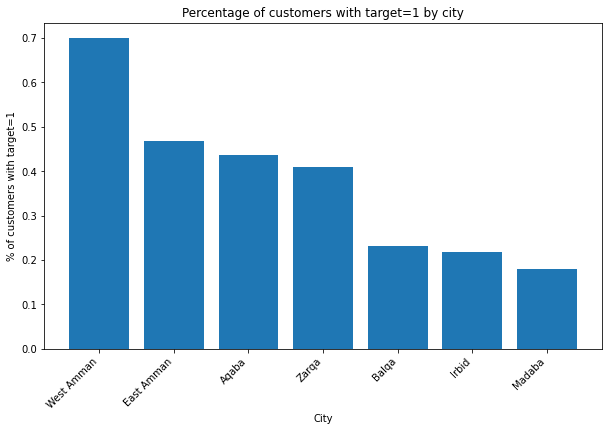

In [ ]:
import matplotlib.pyplot as plt

# calculate the percentage
percentage = df[df['TARGET'] == 1].groupby('GOVERNORATE')['ID'].count() / df.groupby('GOVERNORATE')['ID'].count() * 100

# sort the percentage values in descending order
percentage_sorted = percentage.sort_values(ascending=False)

# create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))  # set the figure size
ax.bar(percentage_sorted.index, percentage_sorted.values)

# add labels and title
ax.set_xlabel('City')
ax.set_ylabel('% of customers with target=1')
ax.set_title('Percentage of customers with target=1 by city')

# rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# show the plot
plt.show()

In [ ]:
# Governorate regarding to churned customers
df_filtered = df[df['TARGET'] == 1]
df_filtered.groupby('GOVERNORATE')['ID'].nunique().sort_values(ascending = False)


GOVERNORATE
West Amman    305
East Amman    166
Irbid          16
Zarqa          10
Balqa           7
Aqaba           2
Madaba          2
Name: ID, dtype: int64

In [ ]:
# filling categorical missing values and fixing them
df['GOVERNORATE'] = df['GOVERNORATE'].fillna('West Amman')
df.dropna(subset = ['CUSTOMER_GENDER'], inplace = True, how = 'any')
unkown_gender = df[df['CUSTOMER_GENDER'] == 'U'].index
df.drop(unkown_gender, axis = 0, inplace = True)

# filling numerical  missing values 

df['GB_TOTAL_CONSUMPTION_Month1'] = df['GB_TOTAL_CONSUMPTION_Month1'].fillna(df.GB_TOTAL_CONSUMPTION_Month1.median())
df['GB_TOTAL_CONSUMPTION_Month2'] = df['GB_TOTAL_CONSUMPTION_Month2'].fillna(df.GB_TOTAL_CONSUMPTION_Month2.median())
df['GB_TOTAL_CONSUMPTION_Month3'] = df['GB_TOTAL_CONSUMPTION_Month3'].fillna(df.GB_TOTAL_CONSUMPTION_Month3.median())

df['Disconnection_TOTAL_MIN_day'] = df['Disconnection_TOTAL_MIN_day'].fillna(df.Disconnection_TOTAL_MIN_day.mean())
df['Disconnection_TOTAL_MEAN_Month'] = df['Disconnection_TOTAL_MEAN_Month'].fillna(df.Disconnection_TOTAL_MEAN_Month.mean())


In [ ]:
#feature engineering 

# add a new column that equals the average of the consumption in the three months
df['GB_TOTAL_MEAN_CONSUMPTION'] = (df['GB_TOTAL_CONSUMPTION_Month1'] + df['GB_TOTAL_CONSUMPTION_Month2'] + df['GB_TOTAL_CONSUMPTION_Month3']) / 3

# add a new column that convert costumer age by months to years

df['CUSTOMER_AGE_YEARS'] = df['CUSTOMER_AGE_MONTHS'] / 12

# make a new column that divide the customers ages to groups 
def age_group(age):
  if age < 18:
    return 'child'
  elif age <25:
    return 'teenager'
  elif age < 60:
    return 'adult'
  else:
    return 'senior'      

df['age_group'] = df['CUSTOMER_AGE_YEARS'].apply(age_group)

In [ ]:
# encoding catgeforical variables using mapping 

governorate_mapping = {"West Amman": 1, "East Amman": 2, "Irbid": 3, "Zarqa": 4, "Balqa": 5, "Aqaba" : 6, "Madaba" : 7}
df['GOVERNORATE'] = df['GOVERNORATE'].map(governorate_mapping)

age_group_mapping = {"child": 1, "teenager": 2, "adult": 3, "senior": 4}
df['age_group'] = df['age_group'].map(age_group_mapping)

In [ ]:
# Perform one-hot encoding on the 'gender' and 'migration_flag' columns
one_hot = pd.get_dummies(df[['CUSTOMER_GENDER', 'MIGRATION_FLAG']])

# Concatenate the one-hot encoded columns with the original dataframe
df = pd.concat([df, one_hot], axis=1)

In [ ]:
df.columns

Index(['ID', 'GOVERNORATE', 'Customer with orange_MONTHS',
       'CUSTOMER_AGE_MONTHS', 'CUSTOMER_GENDER', 'COMMITMENT', 'COMMITMENT_FG',
       'OF_SPEED', 'OF_PREV_SPEED', 'MIGRATION_FLAG', 'LAST_LINK_QUALITY',
       'LAST_LINK_STATUS', 'LAST_POWER_VALIDATION', 'LAST_LINK_PRIORITY',
       'Disconnection_TOTAL_MAX_day', 'Disconnection_TOTAL_MIN_day',
       'Disconnection_TOTAL_SUM_Month', 'Disconnection_TOTAL_MEAN_Month',
       'GB_TOTAL_CONSUMPTION_Month1', 'GB_TOTAL_CONSUMPTION_Month2',
       'GB_TOTAL_CONSUMPTION_Month3', 'TARGET', 'GB_TOTAL_MEAN_CONSUMPTION',
       'CUSTOMER_AGE_YEARS', 'age_group', 'CUSTOMER_GENDER_F',
       'CUSTOMER_GENDER_M', 'MIGRATION_FLAG_n', 'MIGRATION_FLAG_y'],
      dtype='object')

In [ ]:
# drop the unnceccasry columns
df.drop(['ID', 'OF_PREV_SPEED','LAST_LINK_QUALITY' ,'LAST_LINK_STATUS', 'LAST_POWER_VALIDATION', 'LAST_LINK_PRIORITY', 'Disconnection_TOTAL_MIN_day',
                'Disconnection_TOTAL_SUM_Month', 'GB_TOTAL_CONSUMPTION_Month2', 'GB_TOTAL_CONSUMPTION_Month3'], axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

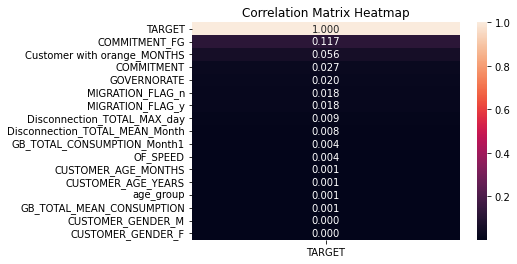

In [ ]:
target_col = 'TARGET'
# Calculate the correlation matrix for the target variable
corr_matrix = df.corr()[[target_col]]

# Sort the absolute correlation values in ascending order
sorted_index = corr_matrix.abs()[target_col].sort_values(ascending = False).index

# Reorder the rows of the correlation matrix based on the sorted index
sorted_corr_matrix = corr_matrix.loc[sorted_index]

# Create a heatmap of the sorted correlation matrix
heatmap = sns.heatmap(sorted_corr_matrix.abs(), annot=True, fmt='.3f')
heatmap.set_title('Correlation Matrix Heatmap')


In [ ]:
# convert the new dataframe from Python to Excel to do some data visualization in Tabluea :)
df.to_excel('new_FTTH_2.xlsx')

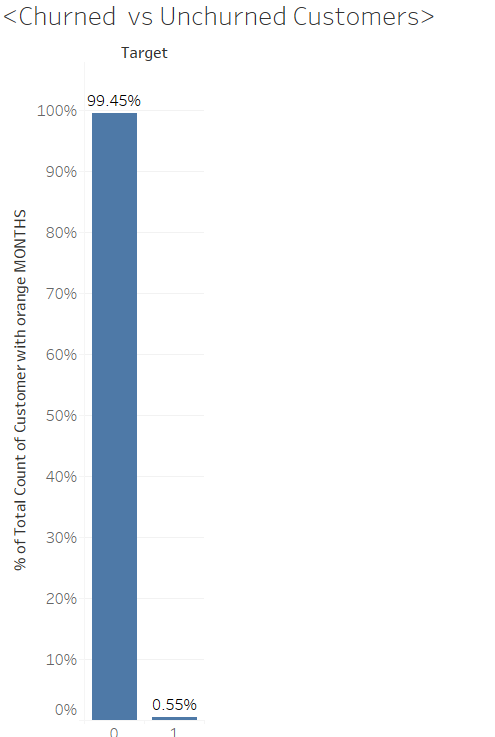

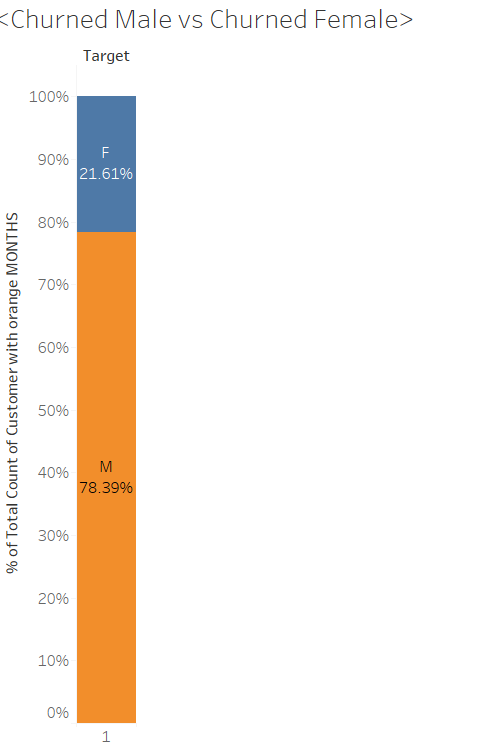

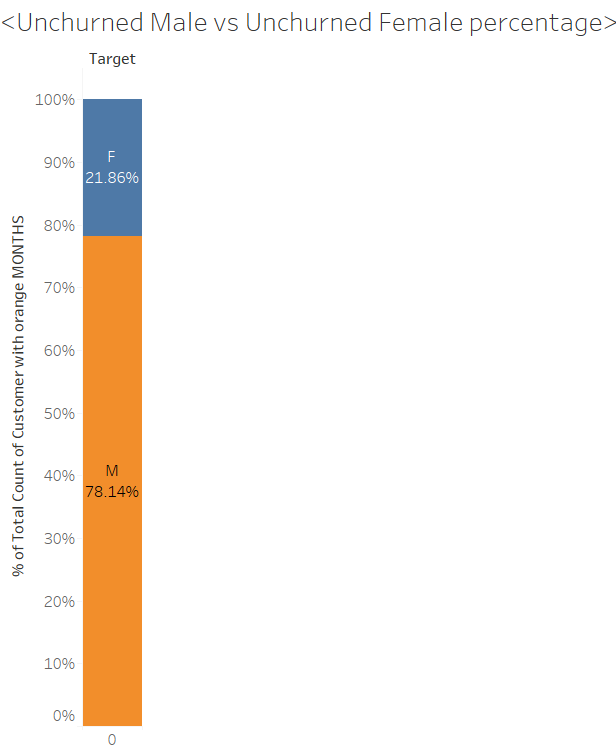

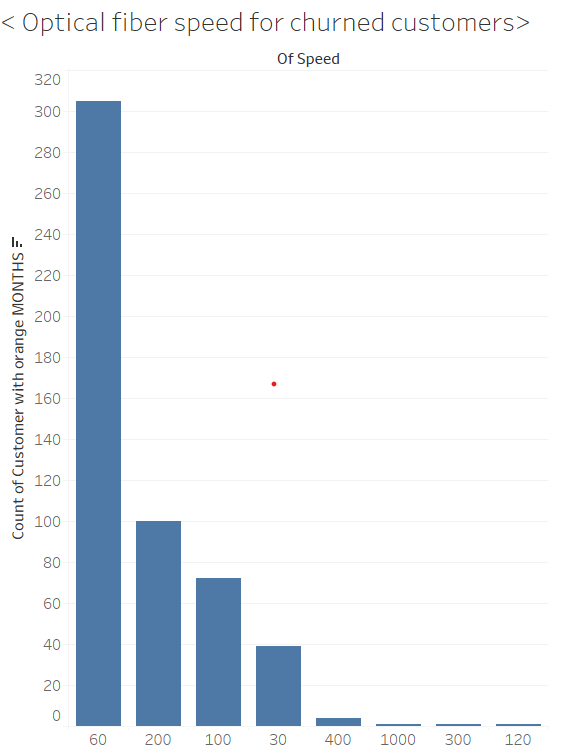

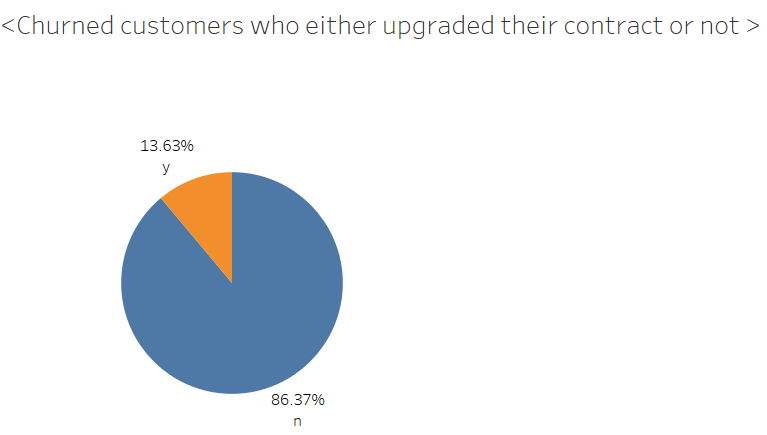

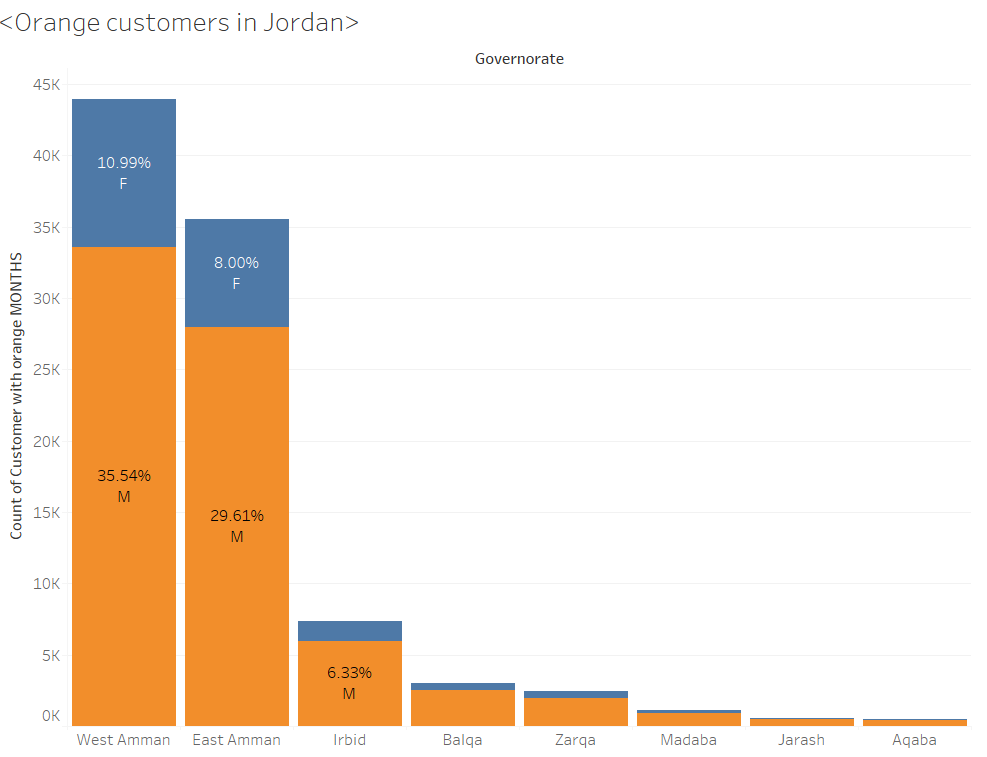

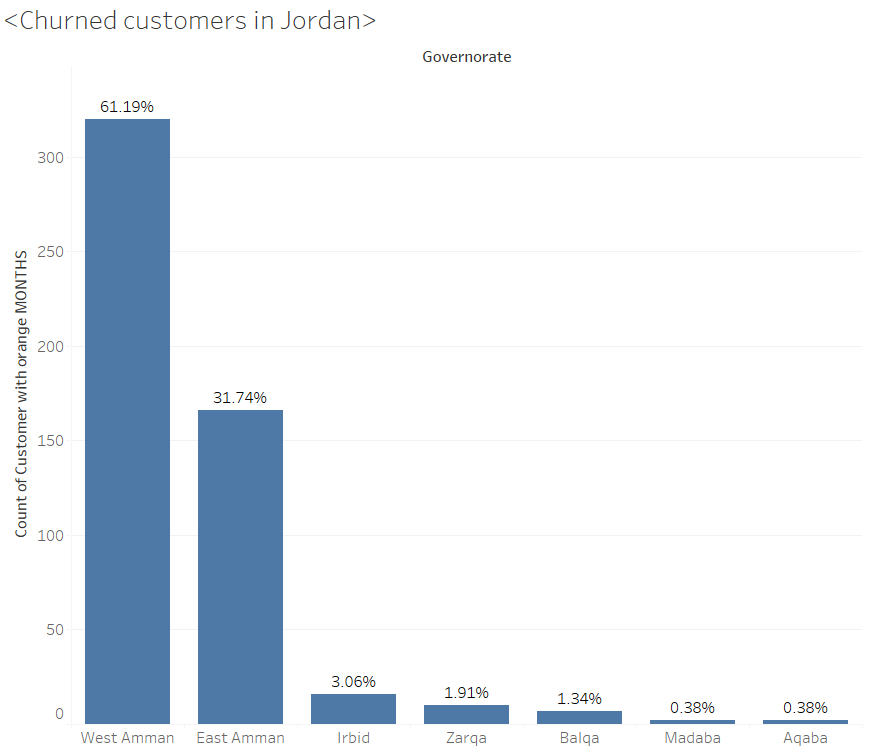

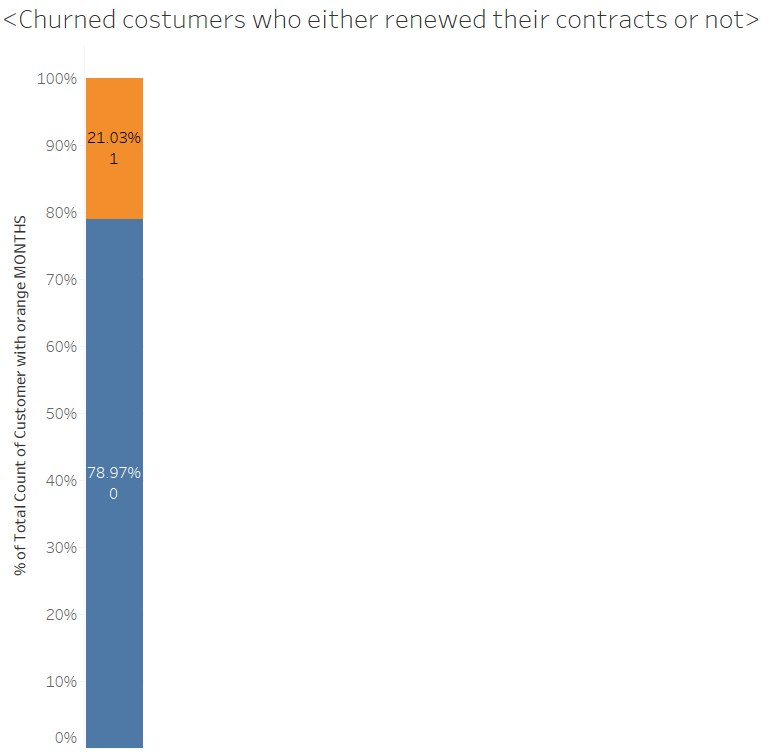

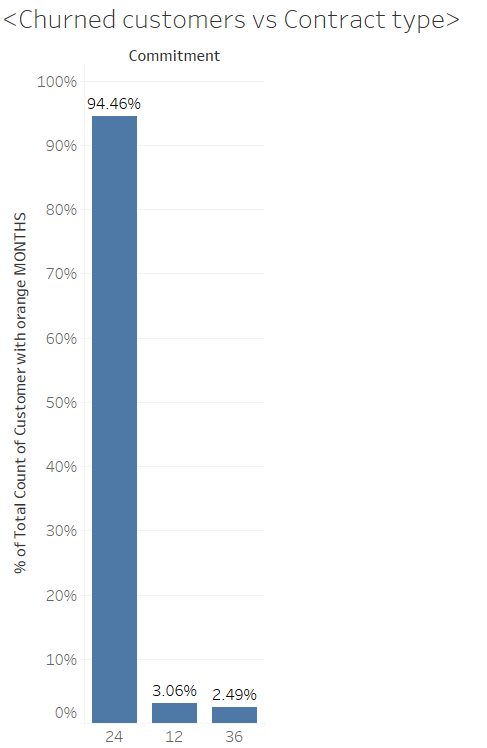

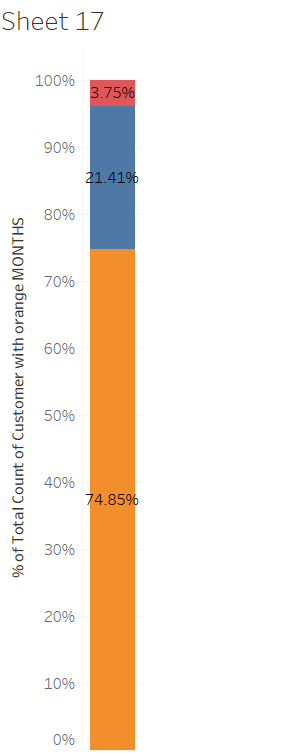

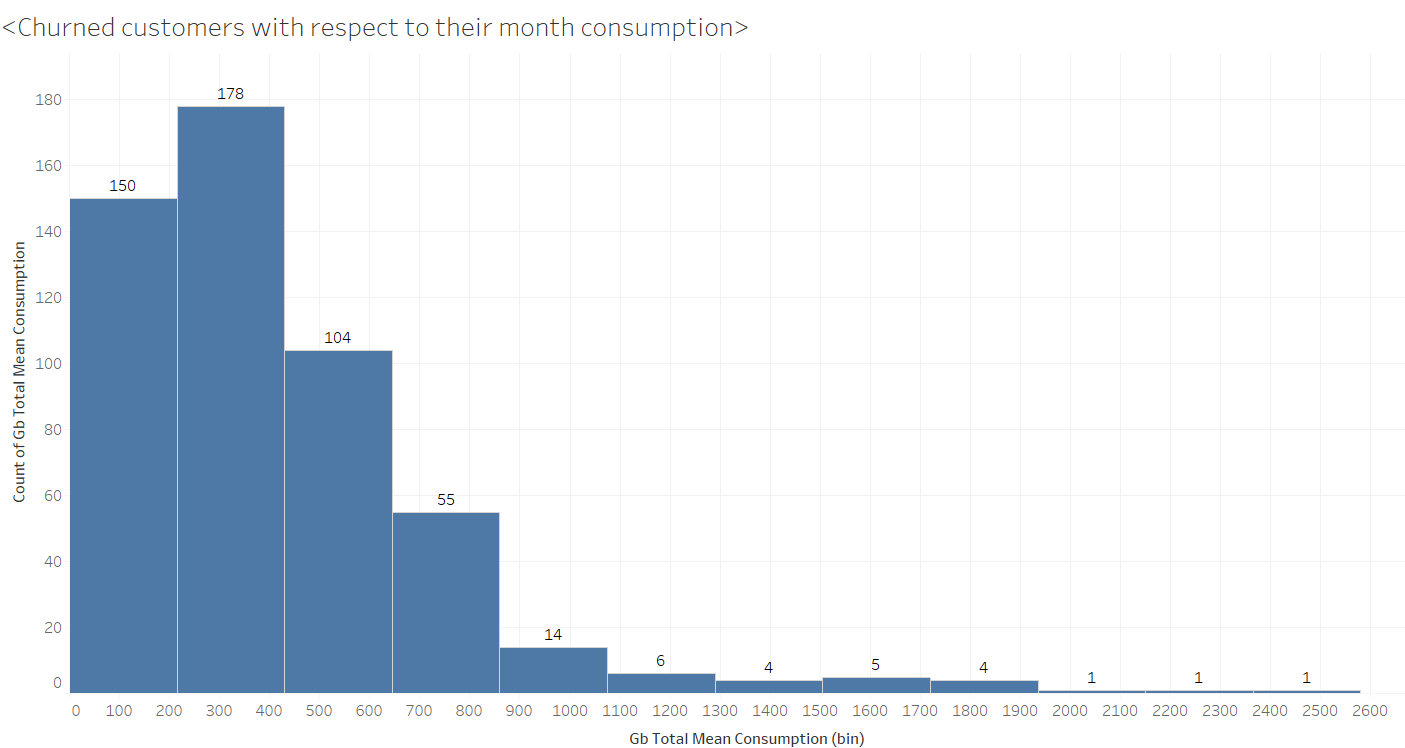

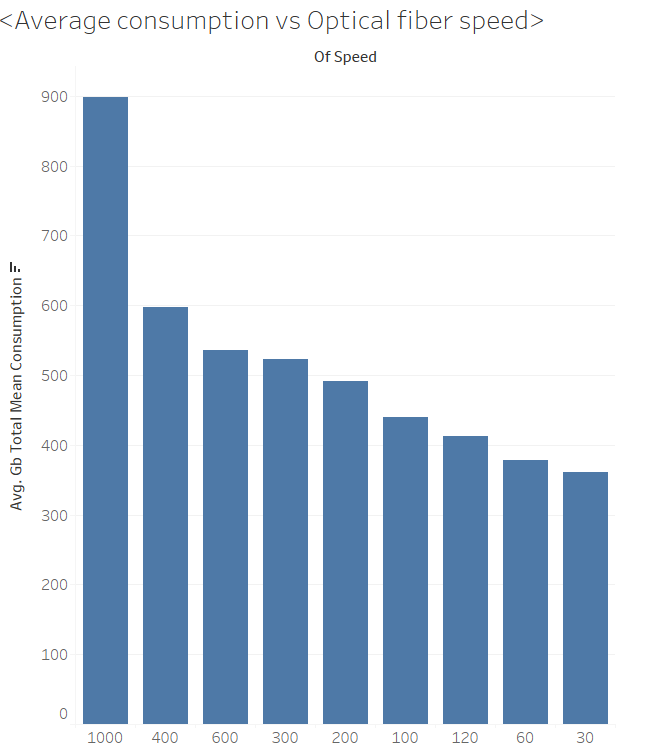

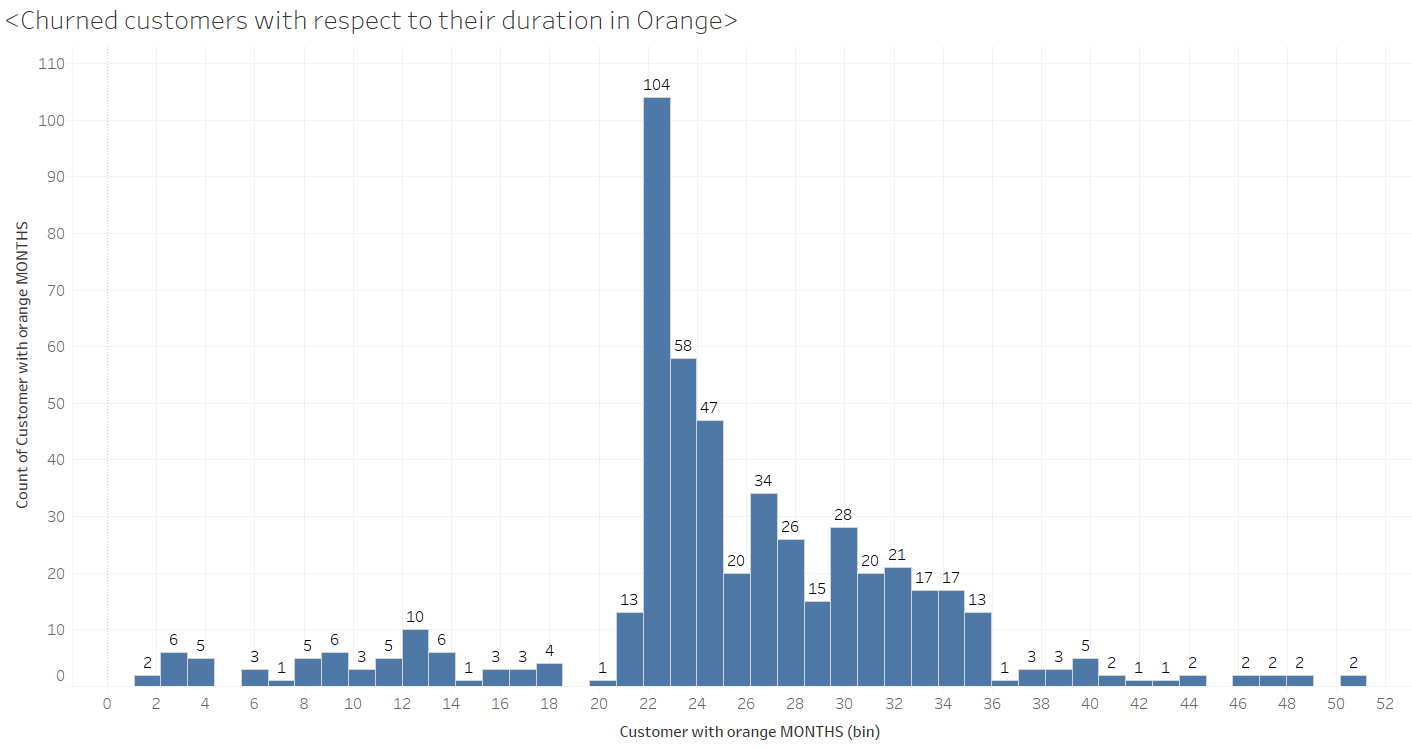

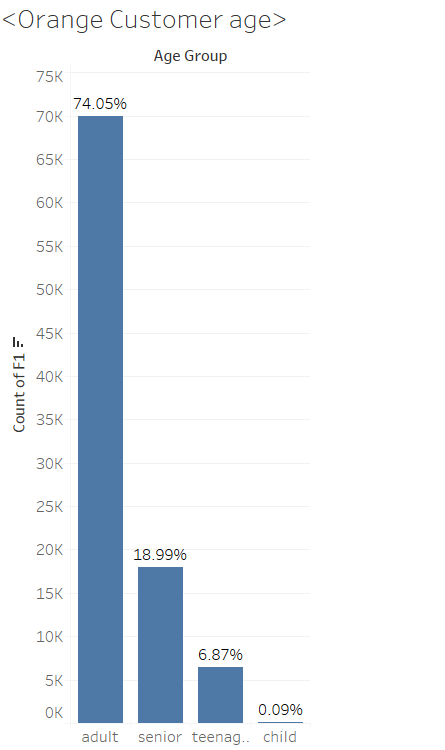

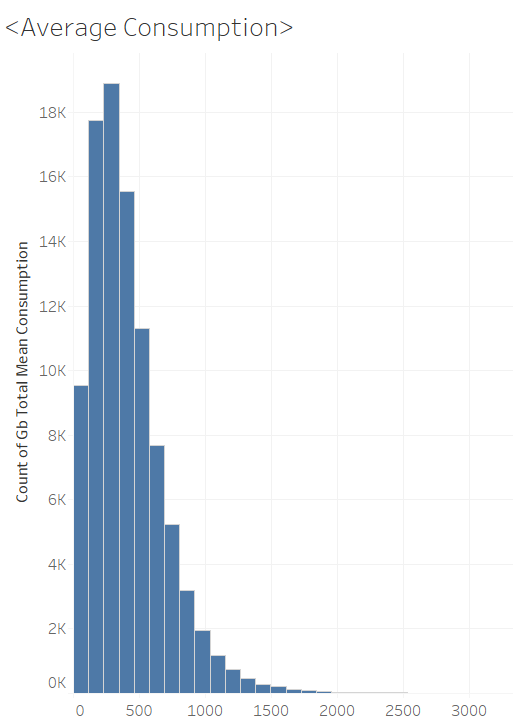

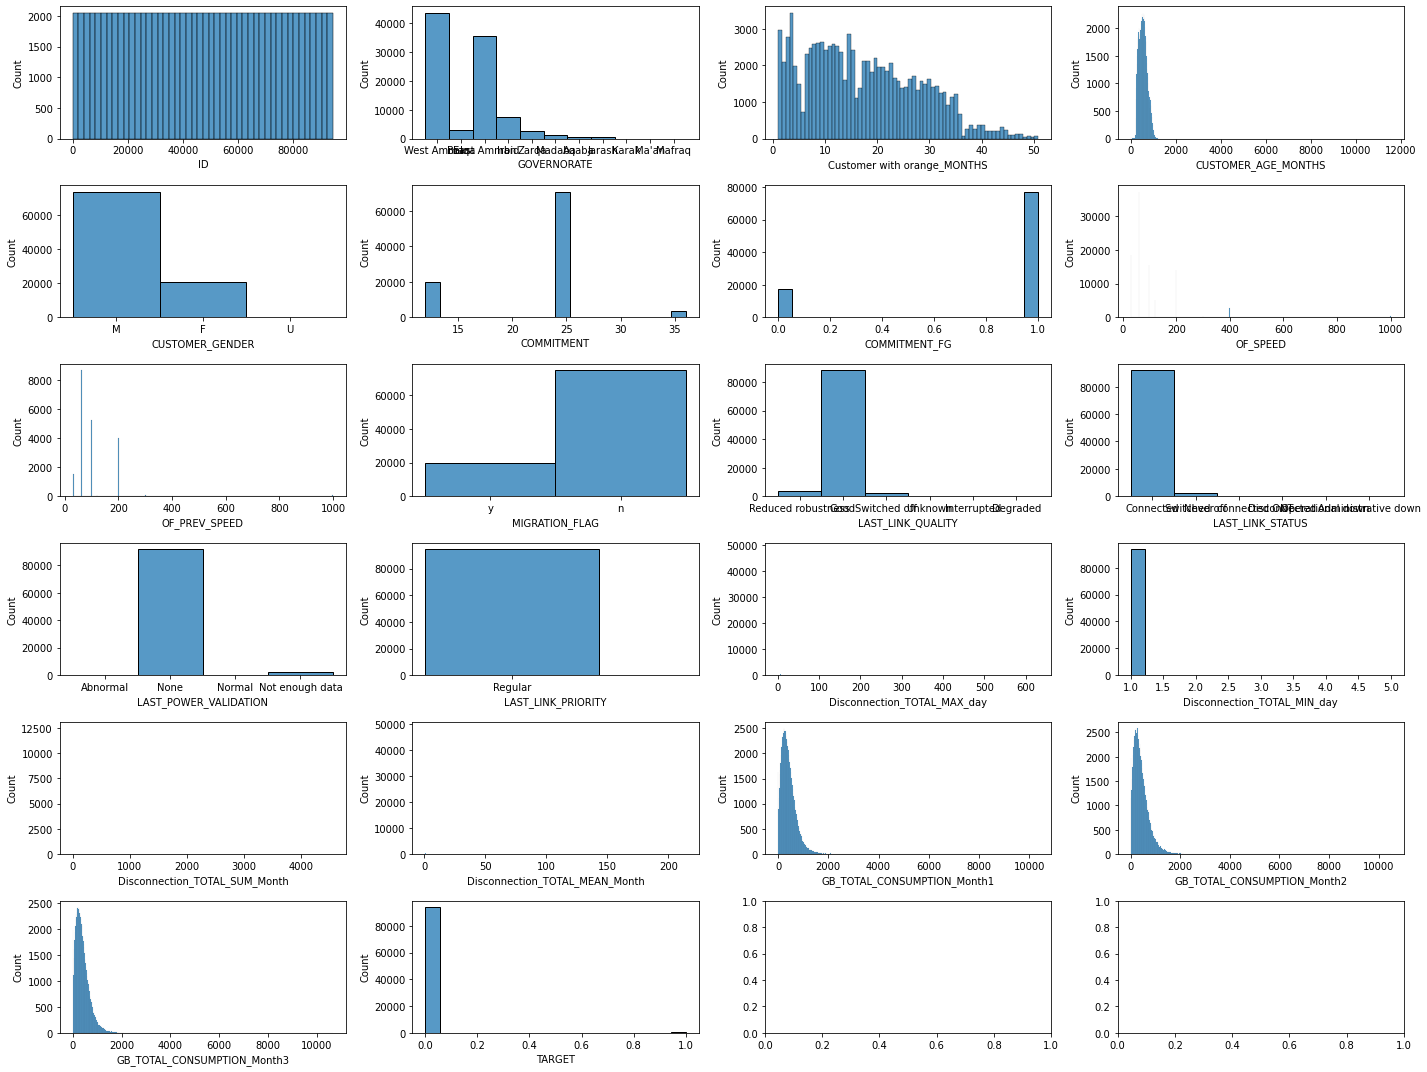

In [ ]:
# Create a figure and a set of subplots with as many rows as needed and 4 columns
num_rows = (len(df.columns) + 2) // 4  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20,15))

# Create a histplot for each column in the DataFrame
for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, ax=axes[i // 4, i % 4])
plt.tight_layout()
plt.show()